In [95]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings("ignore")

#### Neste caso, vamos usar a função log em todas as variáveis

In [96]:
# leitura e exclusão de Myanmar
country = pd.read_csv("../data/Country-data.csv", index_col='country')
country.drop(labels="Myanmar", axis=0, inplace=True)

In [97]:
# copia do DF e aplicação da função np.log em todas variáveis
country_log = country.copy()
country_log = np.log(country)

In [98]:
# definição de variáveis para uso nos modelos
X1 = 'income'
X2 = 'gdpp'
vars = ['income', 'gdpp']

In [99]:
# criação do modelo, fit e predict 
model_log = KMeans(n_clusters=3,
                    n_init=100,
                    max_iter=1000,
                    random_state=42)

model_log.fit(country_log[vars])
country_log['clusters'] = model_log.predict(country_log[vars])

In [100]:
# clusters encontrados
cluster_0_all = country_log[country_log['clusters'] == 0]
cluster_1_all = country_log[country_log['clusters'] == 1]
cluster_2_all = country_log[country_log['clusters'] == 2]

# visualização do tamanho
print(f"""Cluster 0: {len(cluster_0_all)}
Cluster 1: {len(cluster_1_all)}
Cluster 2: {len(cluster_2_all)}""")

Cluster 0: 75
Cluster 1: 49
Cluster 2: 42


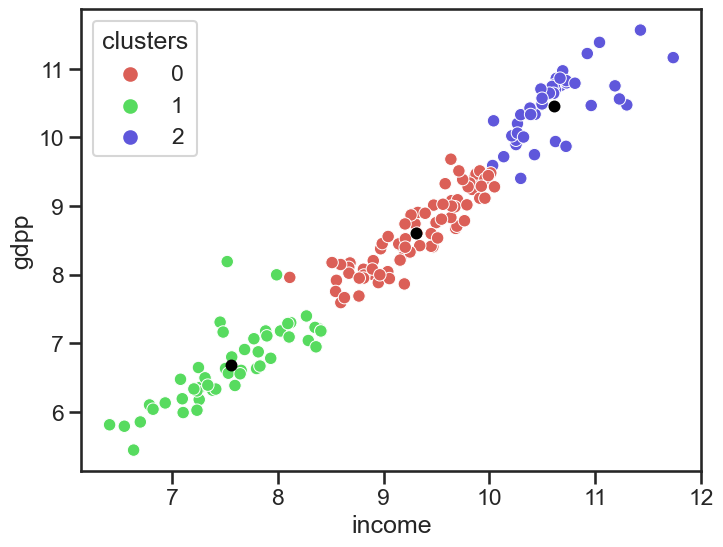

In [101]:
# centroids do modelo
centroids_all = model_log.cluster_centers_

#plot dos clusters e seus centroids
plt.figure(figsize = (8,6))
sns.scatterplot(data = country_log,
                x = X1,
                y = X2,
                hue = country_log['clusters'],
                palette = sns.color_palette('hls', 3))
plt.scatter(centroids_all[:,0],
            centroids_all[:,1],
            c = 'black',
            s = 50)
plt.show()

In [102]:
# cálculo das distancias para o centroid
cluster_0_all['dist_2'] = (cluster_0_all[X1]-centroids_all[0,0])**2 + (cluster_0_all[X2]-centroids_all[0,1])**2
cluster_1_all['dist_2'] = (cluster_1_all[X1]-centroids_all[0,0])**2 + (cluster_1_all[X2]-centroids_all[0,1])**2
cluster_2_all['dist_2'] = (cluster_2_all[X1]-centroids_all[0,0])**2 + (cluster_2_all[X2]-centroids_all[0,1])**2
index_min_0_all = cluster_0_all['dist_2'][cluster_0_all['dist_2'] == cluster_0_all['dist_2'].min()].index
index_min_1_all = cluster_1_all['dist_2'][cluster_1_all['dist_2'] == cluster_1_all['dist_2'].min()].index
index_min_2_all = cluster_2_all['dist_2'][cluster_2_all['dist_2'] == cluster_2_all['dist_2'].min()].index

In [103]:
print(f"""Os 3 países que representam os cluster nos dados com a função LOG em todas as variáveis são:
Cluster 0: {index_min_0_all[0]}
Cluster 1: {index_min_1_all[0]}
Cluster 2: {index_min_2_all[0]}""")

Os 3 países que representam os cluster nos dados com a função LOG em todas as variáveis são:
Cluster 0: Dominican Republic
Cluster 1: Vanuatu
Cluster 2: Estonia


#### Comparando o resultado desse modelo com o modelo anterior podemos identificar que o resultado foi o mesmo. Os mesmos 3 países foram encontrados, ou seja, neste caso, não houve diferença entre usar duas variáveis com log, ou todas elas com log. Inclusive a quantidade foi a mesma.

_________________

#### Para o uso da clusterização hierarquica, foi preciso retirar todos os valores nulos (já explicados) dá base

In [104]:
country_log.dropna(inplace=True)

In [105]:
# análise para ver a melhor opção entre os métodos de linkage para o modelo te clusterização aglomerativa
linkage = ['ward', 'complete', 'average', 'single']
distribuicao =[]
for i in range(0,4):
    model_aglo_log = AgglomerativeClustering(n_clusters=3, linkage=linkage[i]).fit(country_log)
    count = model_aglo_log.labels_
    distribuicao.append(count)
   
distribuicao = pd.DataFrame(distribuicao)

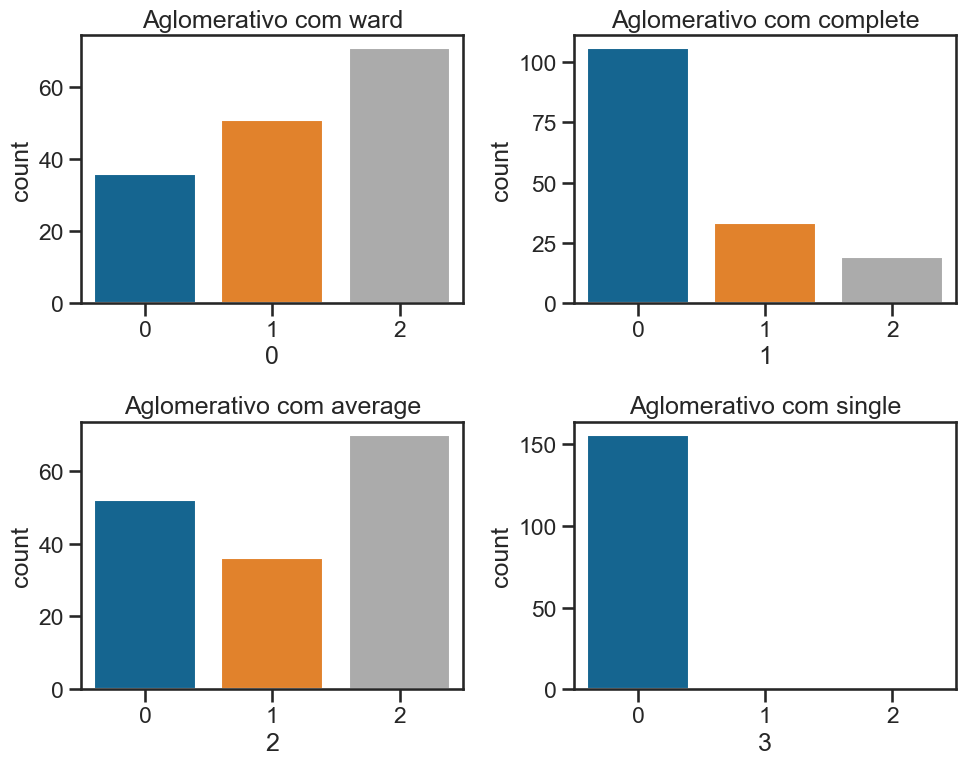

In [106]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(221)
sns.countplot(x=distribuicao.T[0])
ax.set_title('Aglomerativo com ward')

ax = fig.add_subplot(222)
sns.countplot(x=distribuicao.T[1])
ax.set_title('Aglomerativo com complete')

ax = fig.add_subplot(223)
sns.countplot(x=distribuicao.T[2])
ax.set_title('Aglomerativo com average')

ax = fig.add_subplot(224)
sns.countplot(x=distribuicao.T[3])
ax.set_title('Aglomerativo com single')

plt.tight_layout()
plt.show()

#### De acordo com o gráfico acima, podemos ver que os parâmetros "ward" e "average" são muito parecidos para o algoritmo de clusterização. Neste caso, vamos continar com o parâmetro "ward" igual aos outros modelos

Text(0, 0.5, 'Distancias')

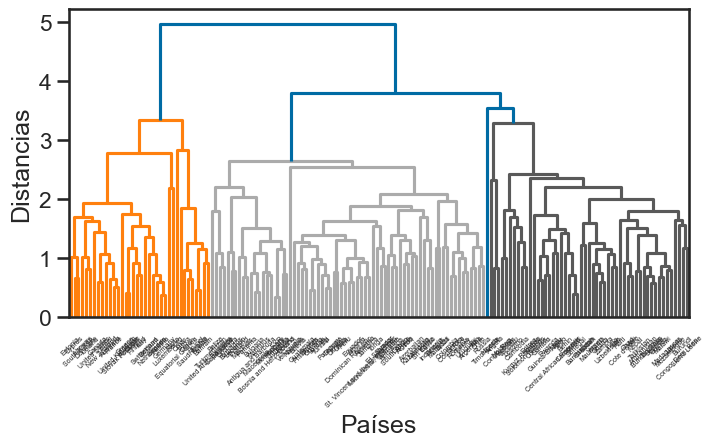

In [107]:
plt.style.use('tableau-colorblind10')
sns.set_style('ticks')
sns.set_context('talk')
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

linkage = sch.linkage(country_log, method="average")
dendrogram = sch.dendrogram(linkage, labels=country_log.index, leaf_rotation=45)

ax.set_xlabel('Países')
ax.set_ylabel('Distancias')

#### Analisando o dendograma, podemos notar que as distâncias entre os clusters agora diminuiram, pelo uso da função log, com isso, uma maior separação pode ser feita pelo algoritmo. É possível notar 3 clusters inferiores distintos, enquanto no modelo com 2 variáveis com log, apenas 2 clusters foram encontrados.

__________________

#### Abaixo, vamos analisar os medoids. Ao invés de termos centroids de cada cluster e seus pontos mais próximos, os medoidos são os pontos existentes que representam o centro de cada cluster.

In [108]:
# fit e predict do modelo com 3 clusters
model_medoid_log = KMedoids(n_clusters=3, max_iter=1000, random_state=42)
model_medoid_log.fit(country_log[vars])
country_log['clusters_medoid'] = model_medoid_log.predict(country_log[vars])

In [109]:
# clusters encontrados
cluster_0 = country_log[country_log['clusters_medoid'] == 0]
cluster_1 = country_log[country_log['clusters_medoid'] == 1]
cluster_2 = country_log[country_log['clusters_medoid'] == 2]

# visualização do tamanho de cada cluster
print(f"""Cluster 0: {len(cluster_0)}
Cluster 1: {len(cluster_1)}
Cluster 2: {len(cluster_2)}""")

Cluster 0: 48
Cluster 1: 65
Cluster 2: 45


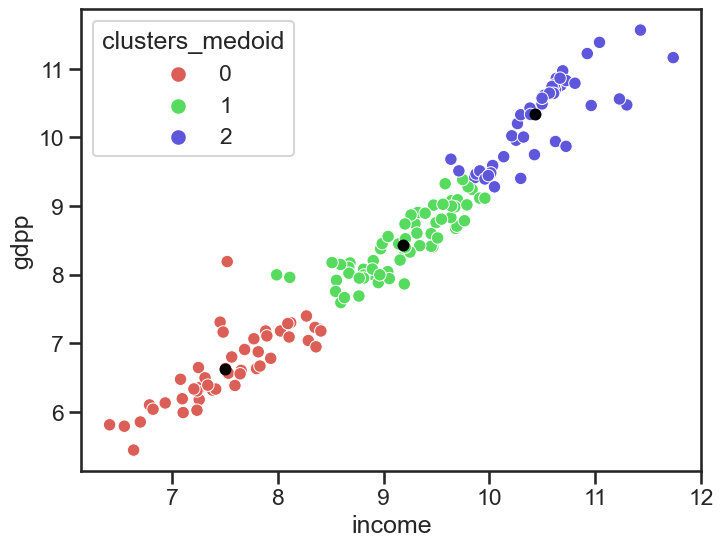

In [110]:
# medoids de cada cluster
medoids = model_medoid_log.cluster_centers_

#plot dos clusters e seus medoids
plt.figure(figsize = (8,6))
sns.scatterplot(data = country_log,
                x = X1,
                y = X2,
                hue = country_log['clusters_medoid'],
                palette = sns.color_palette('hls', 3))
plt.scatter(medoids[:,0],
            medoids[:,1],
            c = 'black',
            s = 50)
plt.show()

In [111]:
# cálculo das distancias para o medoid
cluster_0['dist_2'] = (cluster_0[X1]-medoids[0,0])**2 + (cluster_0[X2]-medoids[0,1])**2
cluster_1['dist_2'] = (cluster_1[X1]-medoids[0,0])**2 + (cluster_1[X2]-medoids[0,1])**2
cluster_2['dist_2'] = (cluster_2[X1]-medoids[0,0])**2 + (cluster_2[X2]-medoids[0,1])**2
index_min_0 = cluster_0['dist_2'][cluster_0['dist_2'] == cluster_0['dist_2'].min()].index
index_min_1 = cluster_1['dist_2'][cluster_1['dist_2'] == cluster_1['dist_2'].min()].index
index_min_2 = cluster_2['dist_2'][cluster_2['dist_2'] == cluster_2['dist_2'].min()].index

In [112]:
print(f"""Os 3 países que representam os cluster nos dados com todas as variáveis com log são:
Cluster 0: {index_min_0[0]}
Cluster 1: {index_min_1[0]}
Cluster 2: {index_min_2[0]}""")

Os 3 países que representam os cluster nos dados com todas as variáveis com log são:
Cluster 0: Benin
Cluster 1: Vanuatu
Cluster 2: Venezuela


#### Neste caso, os medoids representam 3 paíes em desenvolvimento.